In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from load_data import load

In [6]:
df = load()
df

,RegionID,SizeRankZip,RegionName,RegionType,State,City,Metro,CountyName,ZHVI 2003,ZHVI 2008,...,Transit Jobs,Transit Trips/Week,Transit Routes,Transit Shed (sq mi),Transit percentage,Population,Unnamed: 0,STATEFP,COUNTYFP,NatWalkInd
0,91982,1,77494,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,215776.356117,244120.000781,...,56,40,0.0,0.0,0.013,"24,783",38085.0,48.0,157.0,7.968900
1,91940,3,77449,zip,TX,Katy,"Houston-The Woodlands-Sugar Land, TX",Harris County,111490.450128,124187.861811,...,56,40,0.0,0.0,0.013,"24,783",38107.0,48.0,201.0,11.430193
2,91733,5,77084,zip,TX,Houston,"Houston-The Woodlands-Sugar Land, TX",Harris County,109631.516990,123577.558321,...,"218,774","1,900",5.0,31.0,0.039,"2,439,835",38107.0,48.0,201.0,11.430193
3,91926,11,77433,zip,TX,Cypress,"Houston-The Woodlands-Sugar Land, TX",Harris County,197878.948831,221744.762112,...,NaN,NaN,NaN,NaN,NaN,NaN,38107.0,48.0,201.0,11.430193
4,92036,25,77573,zip,TX,League City,"Houston-The Woodlands-Sugar Land, TX",Galveston County,159151.702851,190430.187900,...,NaN,NaN,NaN,NaN,NaN,NaN,38090.0,48.0,167.0,7.878866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124310,59275,28822,3890,zip,NH,Ossipee,NaN,Carroll County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22549.0,33.0,3.0,6.733333
124311,59275,28822,3890,zip,NH,Ossipee,NaN,Carroll County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22549.0,33.0,3.0,6.733333
124312,59275,28822,3890,zip,NH,Ossipee,NaN,Carroll County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22549.0,33.0,3.0,6.733333
124313,59275,28822,3890,zip,NH,Ossipee,NaN,Carroll County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22549.0,33.0,3.0,6.733333


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124315 entries, 0 to 124314
Data columns (total 64 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RegionID               124315 non-null  int64  
 1   SizeRankZip            124315 non-null  int64  
 2   RegionName             124315 non-null  int64  
 3   RegionType             124315 non-null  object 
 4   State                  124315 non-null  object 
 5   City                   115971 non-null  object 
 6   Metro                  7716 non-null    object 
 7   CountyName             124315 non-null  object 
 8   ZHVI 2003              29800 non-null   float64
 9   ZHVI 2008              34973 non-null   float64
 10  ZHVI 2013              74009 non-null   float64
 11  ZHVI 2018              99473 non-null   float64
 12  ZHVI 2019              105359 non-null  float64
 13  ZHVI 2020              105897 non-null  float64
 14  ZHVI 2021              109397 non-nu

In [8]:
df.columns

Index(['RegionID', 'SizeRankZip', 'RegionName', 'RegionType', 'State', 'City',
       'Metro', 'CountyName', 'ZHVI 2003', 'ZHVI 2008', 'ZHVI 2013',
       'ZHVI 2018', 'ZHVI 2019', 'ZHVI 2020', 'ZHVI 2021', 'ZHVI 2022',
       'ZHVI 2023', 'ZHVF BaseDate', 'ZHVF 2024-02-29', 'ZHVF 2024-04-30',
       'ZHVF 2025-01-31', 'ZORI 2018', 'ZORI 2019', 'ZORI 2020', 'ZORI 2021',
       'ZORI 2022', 'ZORI 2023', 'SizeRankMSA', 'Sale Listings 2019',
       'Sale Listings 2020', 'Sale Listings 2021', 'Sale Listings 2022',
       'Sale Listings 2023', 'Sales 2013', 'Sales 2018', 'Sales 2019',
       'Sales 2020', 'Sales 2021', 'Sales 2022', 'Sales 2023',
       'Days on Market 2019', 'Days on Market 2020', 'Days on Market 2021',
       'Days on Market 2022', 'Days on Market 2023', 'New Construction 2018',
       'New Construction 2019', 'New Construction 2020',
       'New Construction 2021', 'New Construction 2022',
       'New Construction 2023', 'Transit Rank', 'Transit Score', 'Transit TCI',
  

In [31]:
df_2019 = df[['RegionID', 'SizeRankZip', 'RegionName', 'State', 'City', 'ZHVI 2019', 'ZORI 2019', 'Sale Listings 2019', 'Sales 2019', 'Days on Market 2019', 'New Construction 2019', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd']]
df_2019 = df_2019.dropna(subset=['ZHVI 2019', 'ZORI 2019', 'Sale Listings 2019', 'Sales 2019', 'Days on Market 2019', 'New Construction 2019', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd'])
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 7451
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RegionID               1167 non-null   int64  
 1   SizeRankZip            1167 non-null   int64  
 2   RegionName             1167 non-null   int64  
 3   State                  1167 non-null   object 
 4   City                   1167 non-null   object 
 5   ZHVI 2019              1167 non-null   float64
 6   ZORI 2019              1167 non-null   float64
 7   Sale Listings 2019     1167 non-null   float64
 8   Sales 2019             1167 non-null   float64
 9   Days on Market 2019    1167 non-null   float64
 10  New Construction 2019  1167 non-null   float64
 11  Transit Score          1167 non-null   float64
 12  Transit Jobs           1167 non-null   object 
 13  Population             1167 non-null   object 
 14  NatWalkInd             1167 non-null   float64
dtypes: f

In [32]:
df_2019['Transit Jobs'] = df_2019['Transit Jobs'].str.replace(',', '').astype(float)
df_2019['Population'] = df_2019['Population'].str.replace(',', '').astype(float)
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1167 entries, 0 to 7451
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RegionID               1167 non-null   int64  
 1   SizeRankZip            1167 non-null   int64  
 2   RegionName             1167 non-null   int64  
 3   State                  1167 non-null   object 
 4   City                   1167 non-null   object 
 5   ZHVI 2019              1167 non-null   float64
 6   ZORI 2019              1167 non-null   float64
 7   Sale Listings 2019     1167 non-null   float64
 8   Sales 2019             1167 non-null   float64
 9   Days on Market 2019    1167 non-null   float64
 10  New Construction 2019  1167 non-null   float64
 11  Transit Score          1167 non-null   float64
 12  Transit Jobs           1167 non-null   float64
 13  Population             1167 non-null   float64
 14  NatWalkInd             1167 non-null   float64
dtypes: f

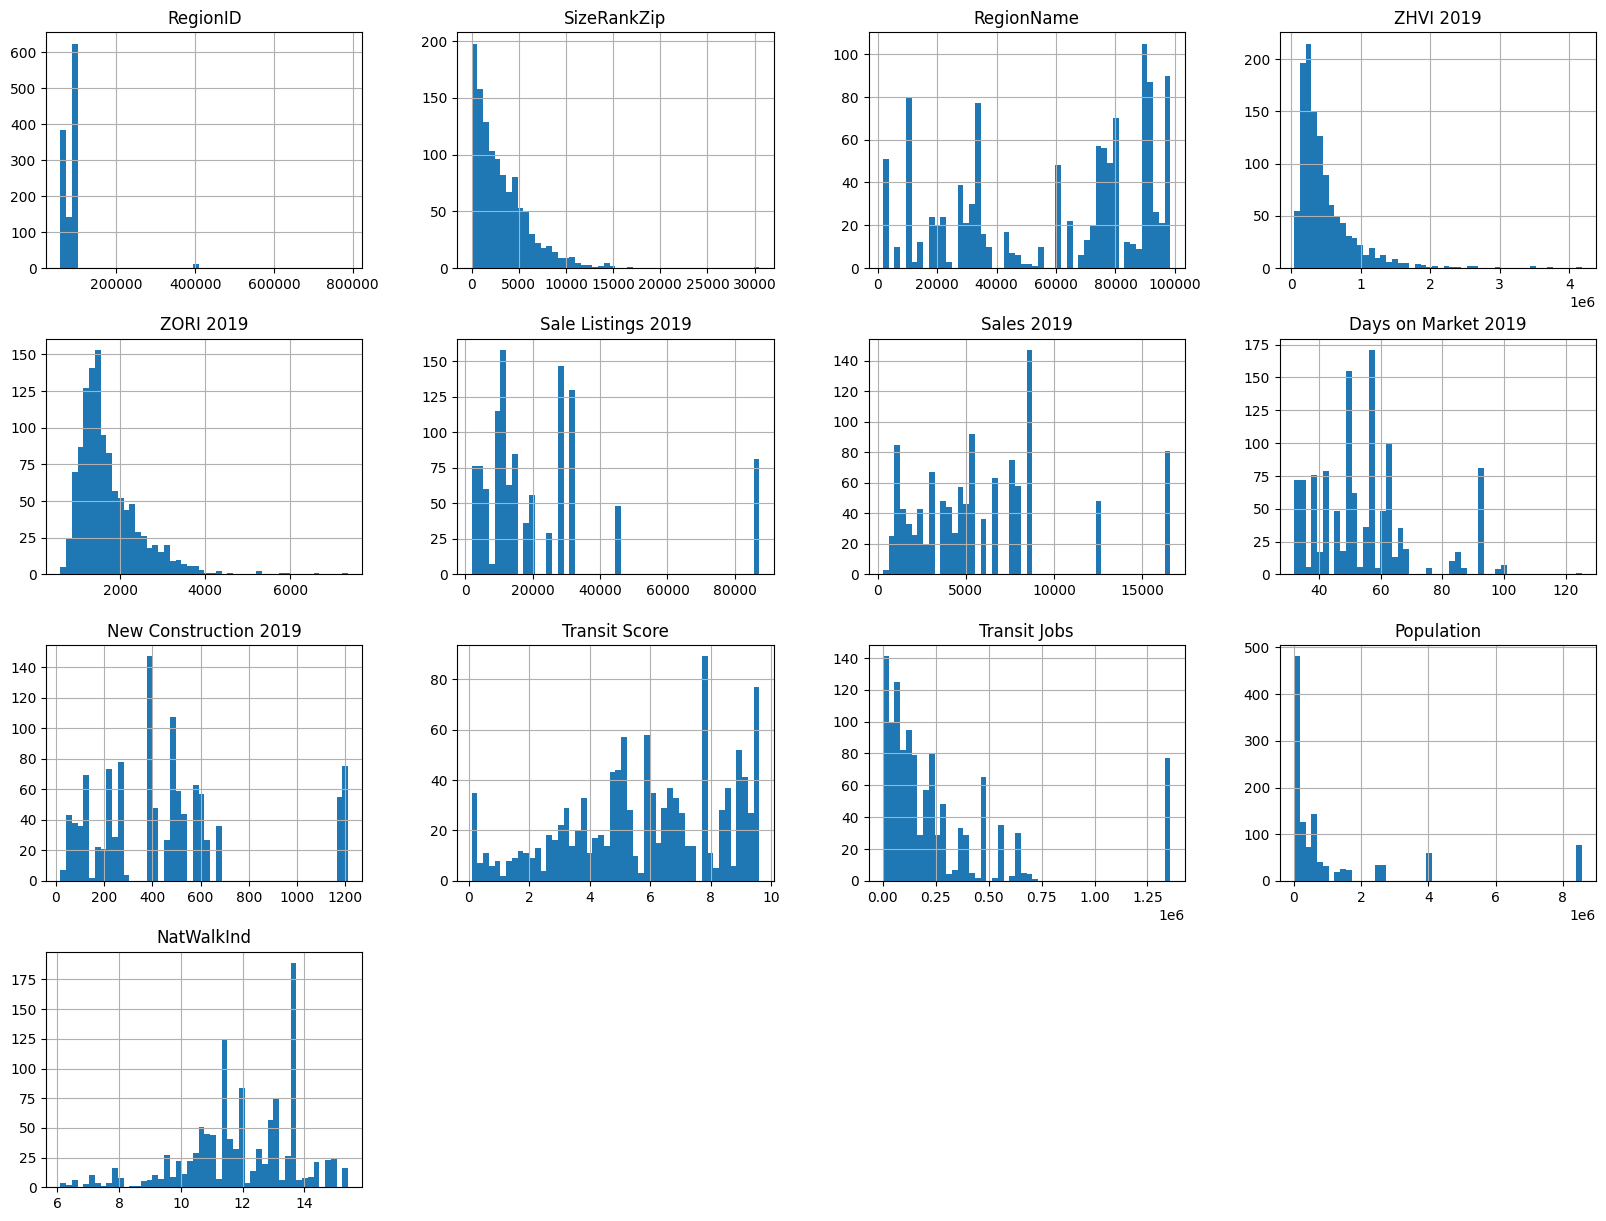

In [33]:
df_2019.hist(bins=50, figsize=(20,15))
plt.show()

Going to use a MinMax Scaler since many of the variables are not normally distributed and we don't need them to be. We just need the data to be normalized

In [34]:
scaler = MinMaxScaler()
normalized_df_2019 = scaler.fit_transform(df_2019[['ZHVI 2019', 'ZORI 2019', 'Sale Listings 2019', 'Sales 2019', 'Days on Market 2019', 'New Construction 2019', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd']])
normalized_df_2019 = pd.DataFrame(normalized_df_2019)
normalized_df_2019.columns = ['ZHVI 2019', 'ZORI 2019', 'Sale Listings 2019', 'Sales 2019', 'Days on Market 2019', 'New Construction 2019', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd']
normalized_df_2019

,ZHVI 2019,ZORI 2019,Sale Listings 2019,Sales 2019,Days on Market 2019,New Construction 2019,Transit Score,Transit Jobs,Population,NatWalkInd
0,0.066913,0.131402,0.343113,0.390411,0.336315,0.963121,0.010526,0.000041,0.001698,0.200651
1,0.034677,0.118834,0.343113,0.390411,0.336315,0.963121,0.010526,0.000041,0.001698,0.572198
2,0.033512,0.125701,0.343113,0.390411,0.336315,0.963121,0.610526,0.160960,0.284166,0.572198
3,0.054594,0.133265,0.343113,0.390411,0.336315,0.963121,0.000000,0.000307,0.012147,0.021365
4,0.049968,0.091269,0.343113,0.390411,0.336315,0.963121,0.000000,0.000000,0.005260,0.572198
...,...,...,...,...,...,...,...,...,...,...
1162,0.021256,0.050388,0.016307,0.051803,0.211986,0.087169,0.484211,0.053479,0.052733,0.615689
1163,0.044268,0.040992,0.016307,0.051803,0.211986,0.087169,0.484211,0.053479,0.052733,0.615689
1164,0.049321,0.061562,0.016307,0.051803,0.211986,0.087169,0.484211,0.053479,0.052733,0.615689
1165,0.046448,0.067893,0.026143,0.045175,0.346154,0.152965,0.284211,0.071514,0.006222,0.164880


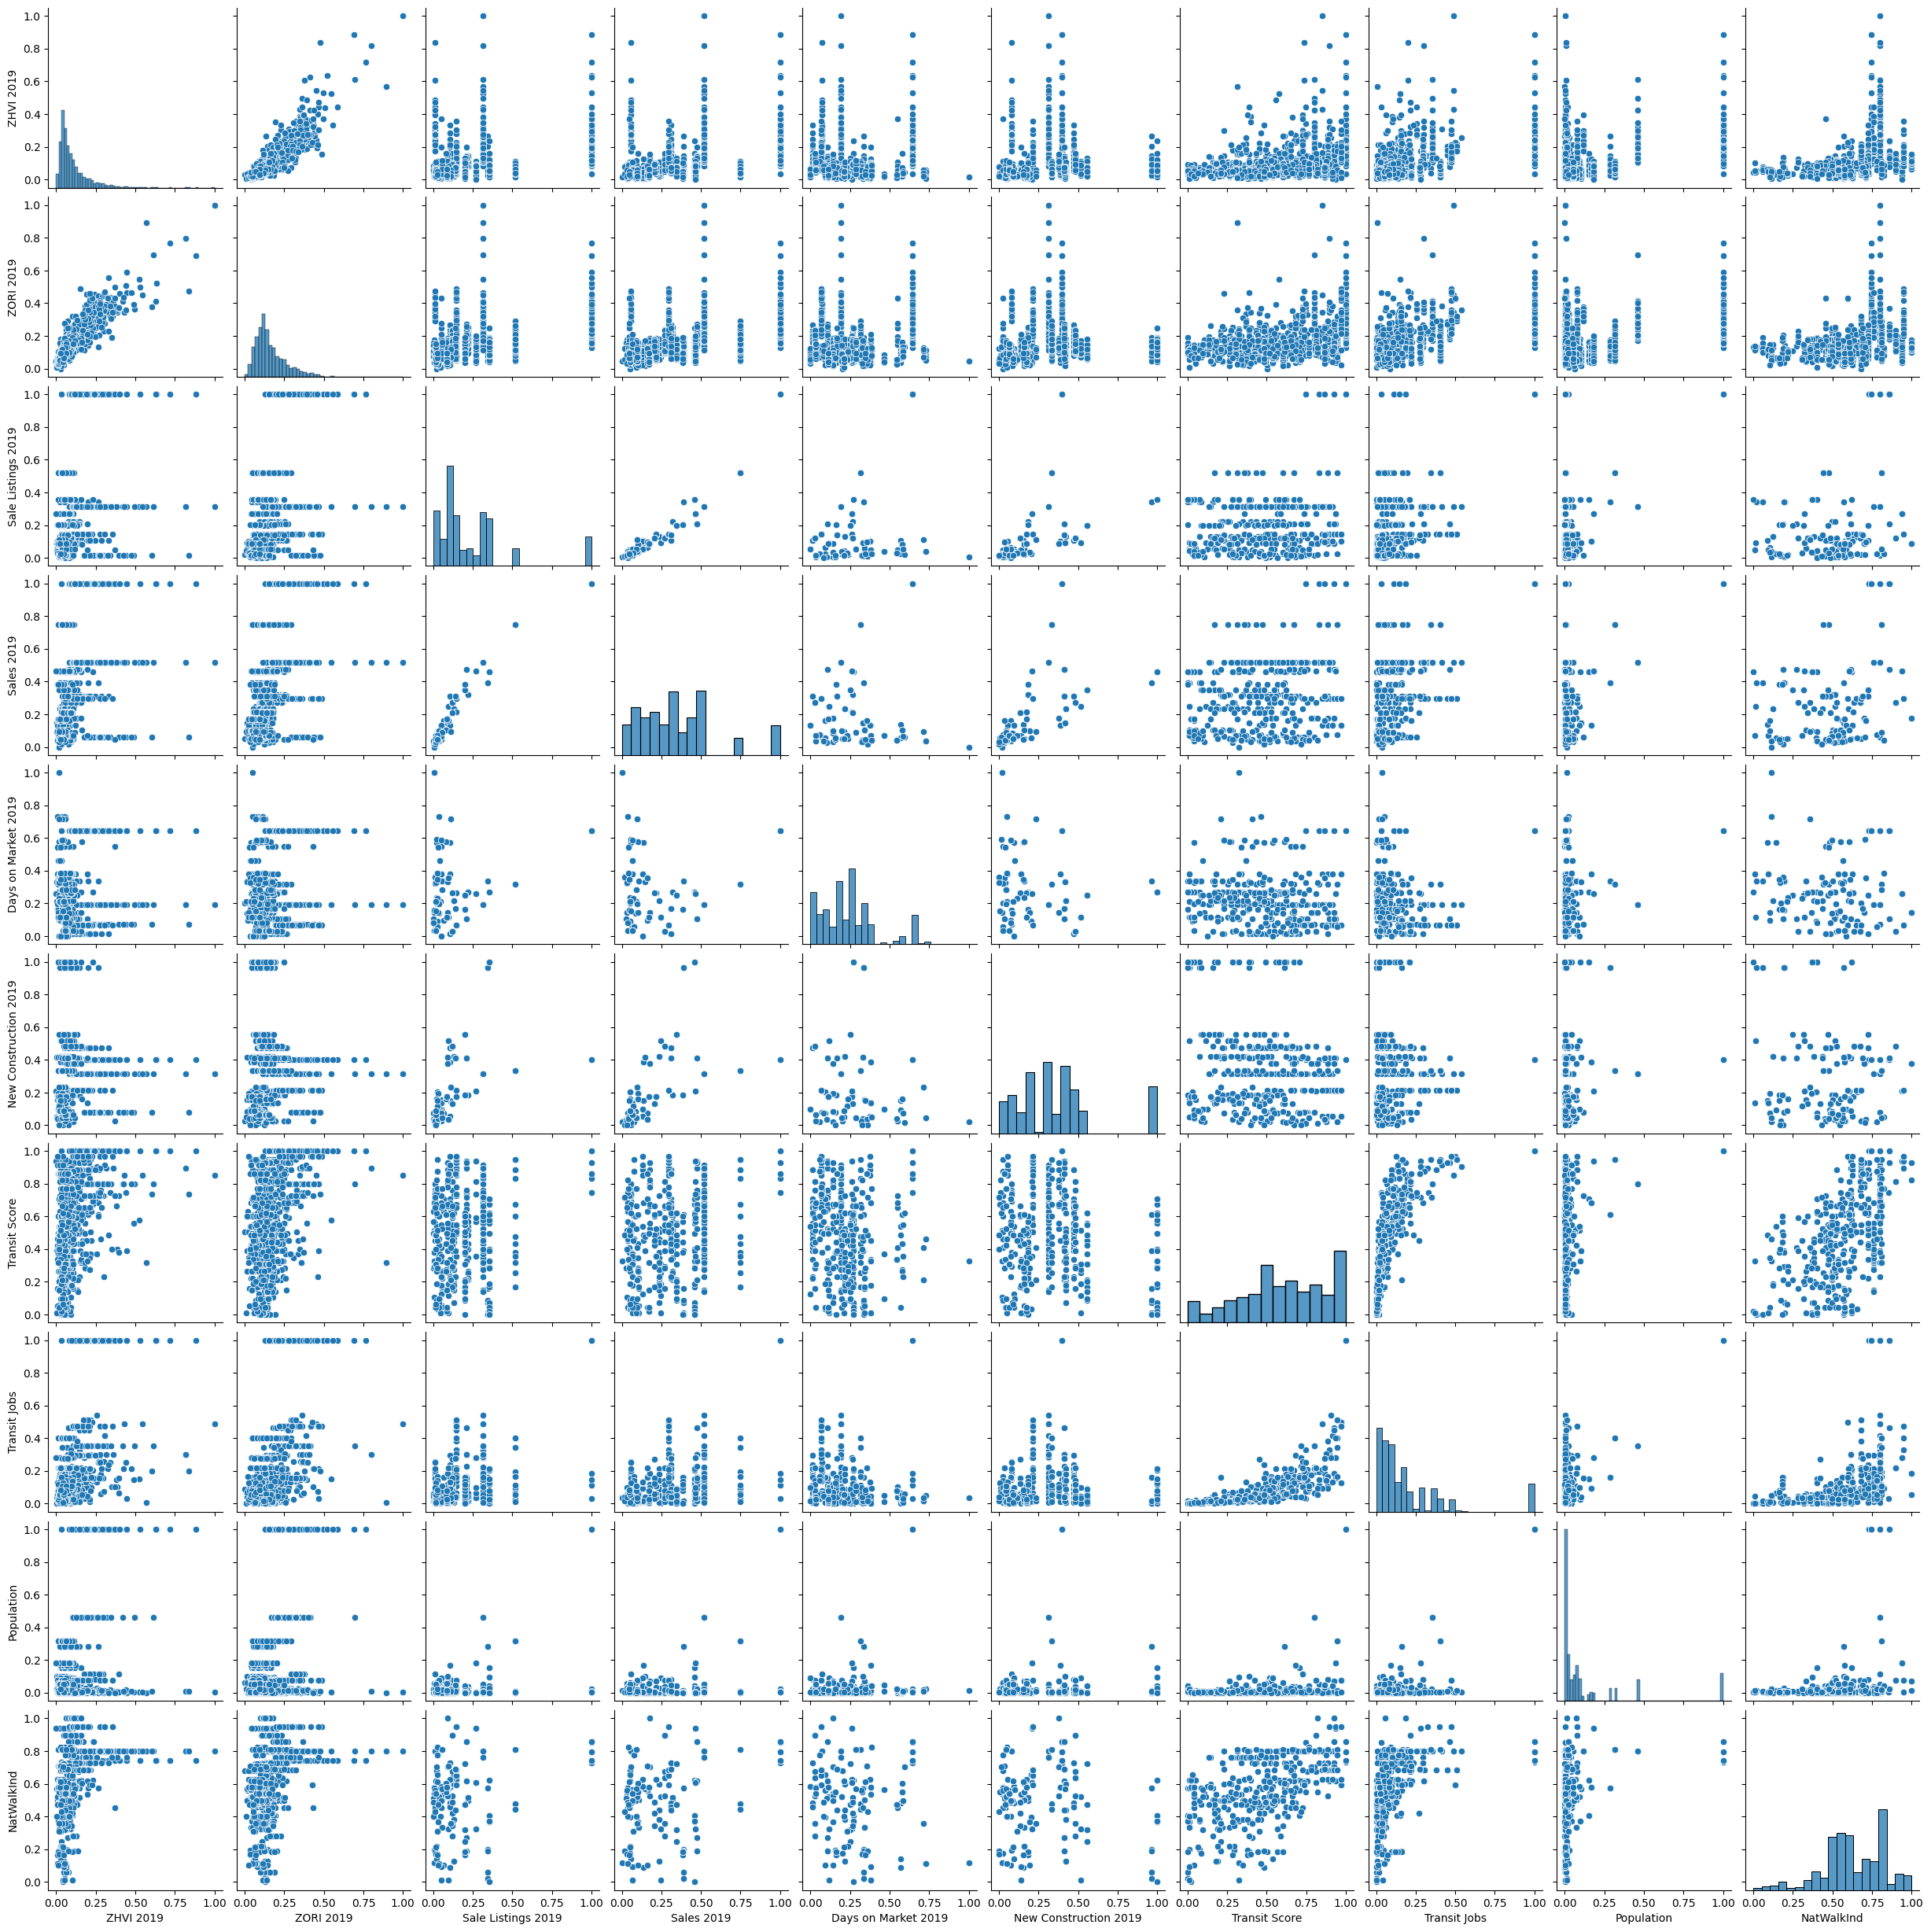

In [35]:
sns.pairplot(normalized_df_2019)

<AxesSubplot:xlabel='Transit Score', ylabel='ZHVI 2019'>

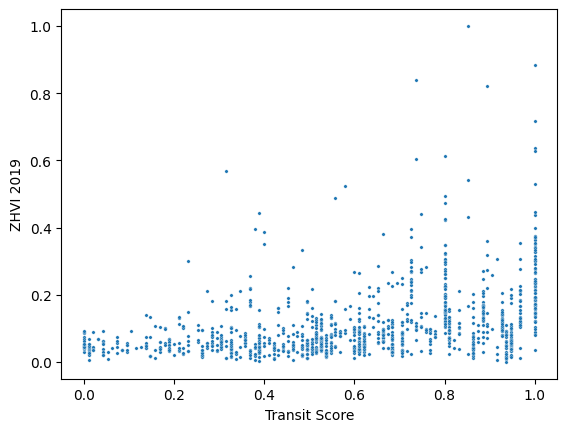

In [37]:
sns.scatterplot(data=normalized_df_2019, x='Transit Score', y='ZHVI 2019', s=6)

Good idea to cluster based on ZHVI and transit scores, this would create a divide in wealthier areas that might be more rural and wealthier urban cities

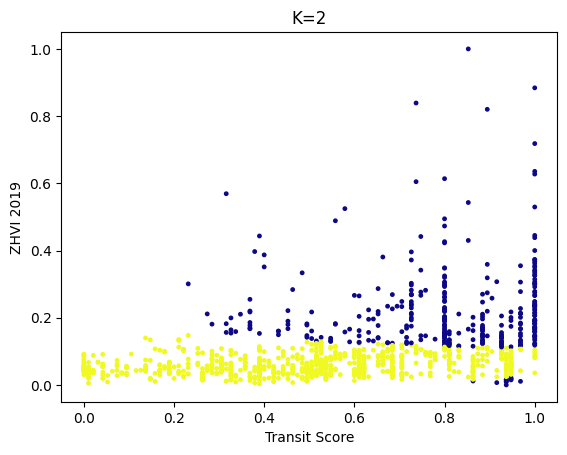

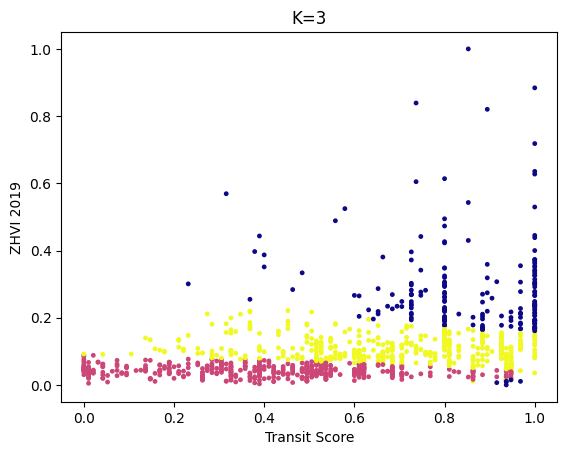

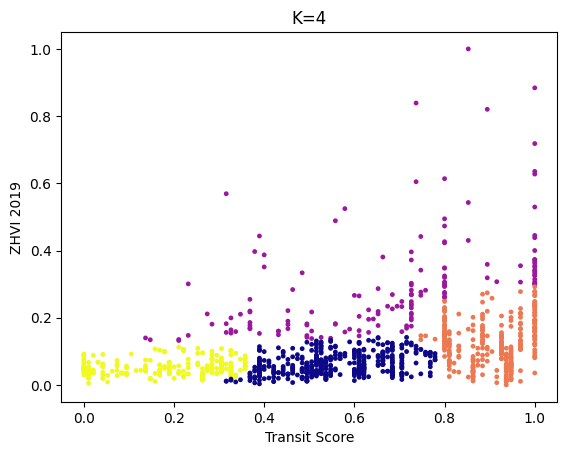

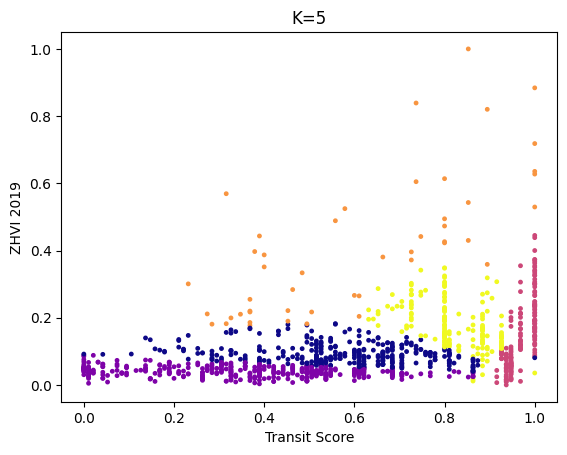

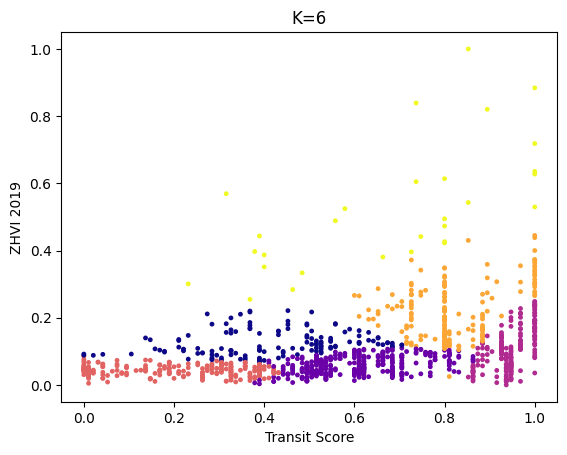

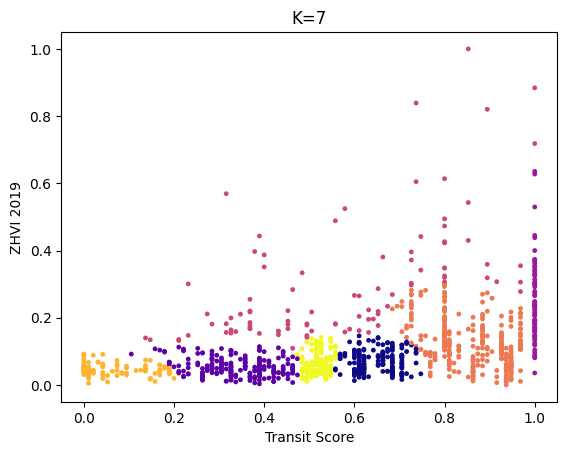

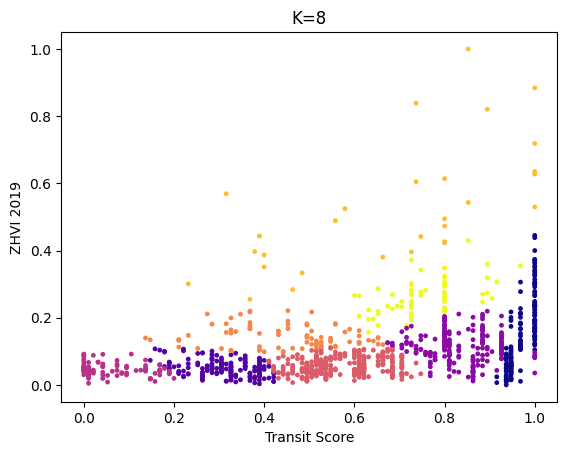

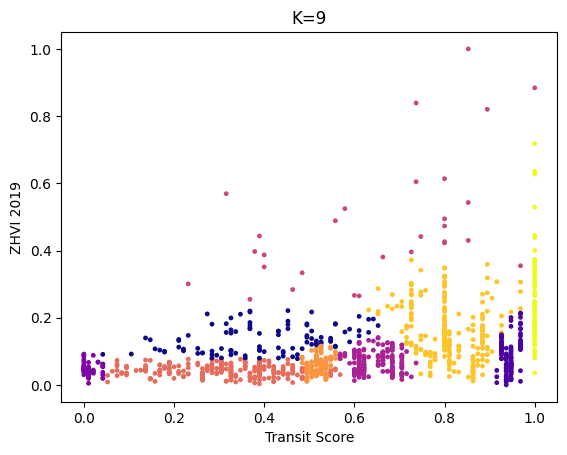

<Figure size 640x480 with 0 Axes>

In [39]:
for k in range(2, 10):
    plt.scatter(normalized_df_2019['Transit Score'], normalized_df_2019['ZHVI 2019'], c= GaussianMixture(n_components= k).fit_predict(normalized_df_2019[["Transit Score", "ZHVI 2019"]]), cmap= plt.cm.plasma, s=6)
    plt.title(f"K={k}")
    plt.xlabel("Transit Score")
    plt.ylabel("ZHVI 2019")
    plt.show()
    plt.clf()

In [40]:
def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)[0]
    log_p_X = gmm_p.score_samples(X)
    log_q_X = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)[0]
    log_p_Y = gmm_p.score_samples(Y)
    log_q_Y = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return np.sqrt((log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2)

def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

Text(0, 0.5, 'Score')

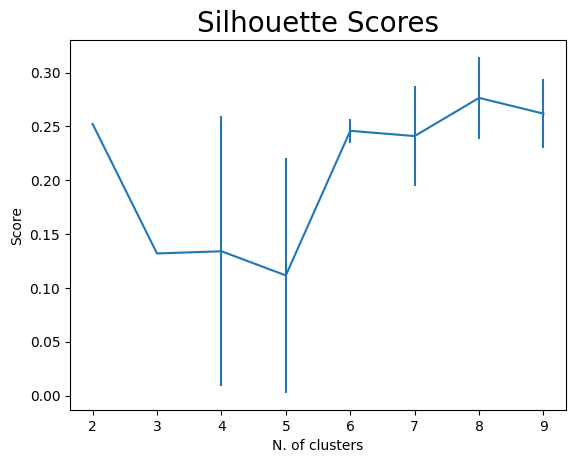

In [46]:
n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(normalized_df_2019[["Transit Score", "ZHVI 2019"]]) 
        labels=gmm.predict(normalized_df_2019[["Transit Score", "ZHVI 2019"]])
        sil=silhouette_score(normalized_df_2019[["Transit Score", "ZHVI 2019"]], labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

Text(0, 0.5, 'Score')

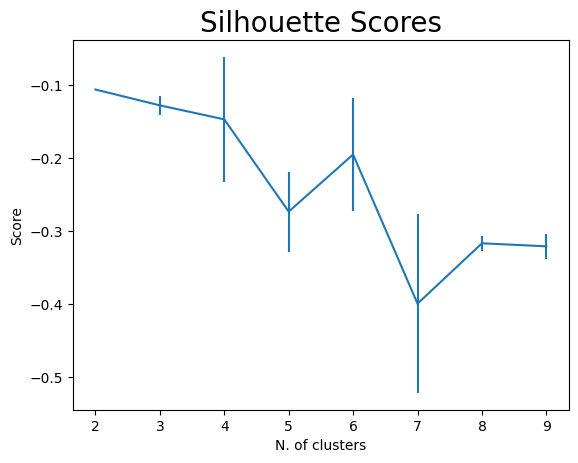

In [47]:
n_clusters=np.arange(2, 10)
sils=[]
sils_err=[]
iterations=5
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(normalized_df_2019[["Transit Score", "ZHVI 2019"]]) 
        labels=gmm.predict(normalized_df_2019[["Transit Score", "ZHVI 2019"]])
        sil=silhouette_score(normalized_df_2019[["Transit Score", "ZHVI 2019"]], labels, metric='cosine')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

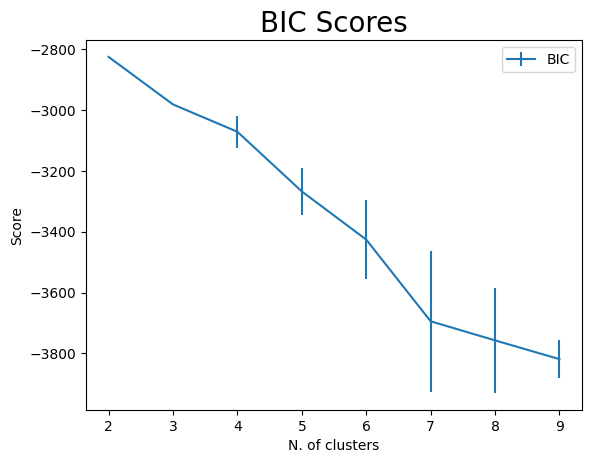

In [48]:
n_clusters=np.arange(2, 10)
bics=[]
bics_err=[]
iterations=20
for n in n_clusters:
    tmp_bic=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(normalized_df_2019[["Transit Score", "ZHVI 2019"]]) 
        tmp_bic.append(gmm.bic(normalized_df_2019[["Transit Score", "ZHVI 2019"]]))
    val=np.mean(SelBest(np.array(tmp_bic), int(iterations/5)))
    err=np.std(tmp_bic)
    bics.append(val)
    bics_err.append(err)

plt.errorbar(n_clusters,bics, yerr=bics_err, label='BIC')
plt.title("BIC Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")
plt.legend()

I like the look of K=8 based on the prices and Transit score. Now lets apply all of the other metrics

In [49]:
normalized_df_2019

,ZHVI 2019,ZORI 2019,Sale Listings 2019,Sales 2019,Days on Market 2019,New Construction 2019,Transit Score,Transit Jobs,Population,NatWalkInd
0,0.066913,0.131402,0.343113,0.390411,0.336315,0.963121,0.010526,0.000041,0.001698,0.200651
1,0.034677,0.118834,0.343113,0.390411,0.336315,0.963121,0.010526,0.000041,0.001698,0.572198
2,0.033512,0.125701,0.343113,0.390411,0.336315,0.963121,0.610526,0.160960,0.284166,0.572198
3,0.054594,0.133265,0.343113,0.390411,0.336315,0.963121,0.000000,0.000307,0.012147,0.021365
4,0.049968,0.091269,0.343113,0.390411,0.336315,0.963121,0.000000,0.000000,0.005260,0.572198
...,...,...,...,...,...,...,...,...,...,...
1162,0.021256,0.050388,0.016307,0.051803,0.211986,0.087169,0.484211,0.053479,0.052733,0.615689
1163,0.044268,0.040992,0.016307,0.051803,0.211986,0.087169,0.484211,0.053479,0.052733,0.615689
1164,0.049321,0.061562,0.016307,0.051803,0.211986,0.087169,0.484211,0.053479,0.052733,0.615689
1165,0.046448,0.067893,0.026143,0.045175,0.346154,0.152965,0.284211,0.071514,0.006222,0.164880


Trying Sales Data Similar to Oviya

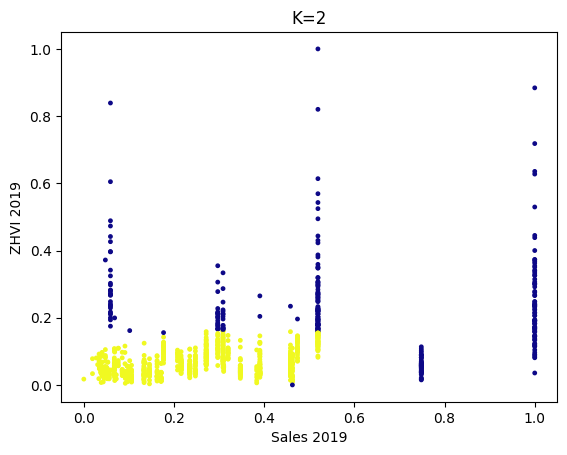

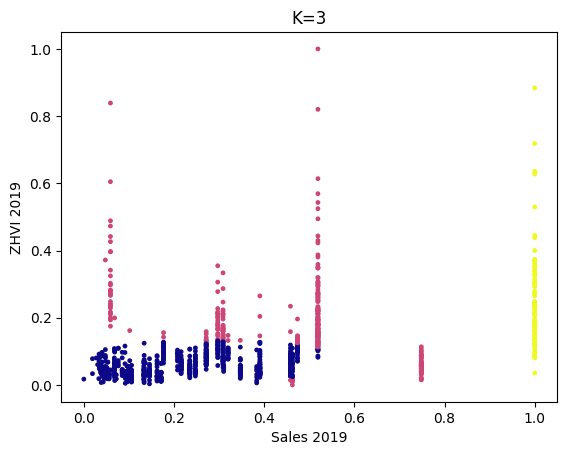

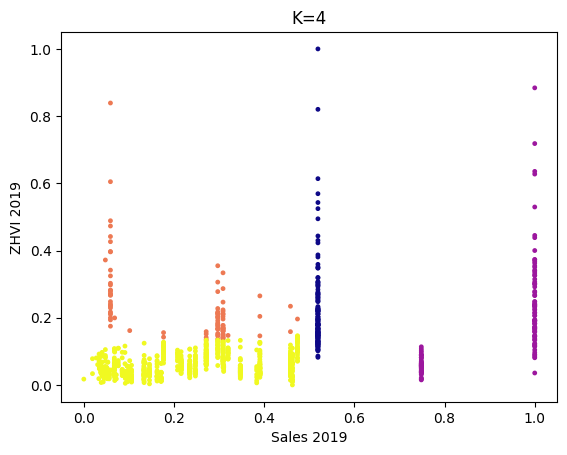

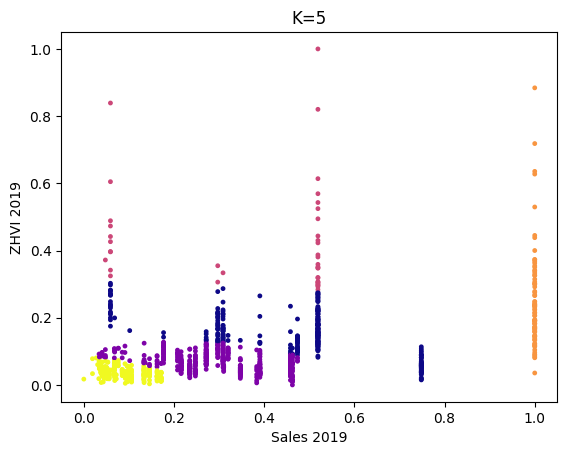

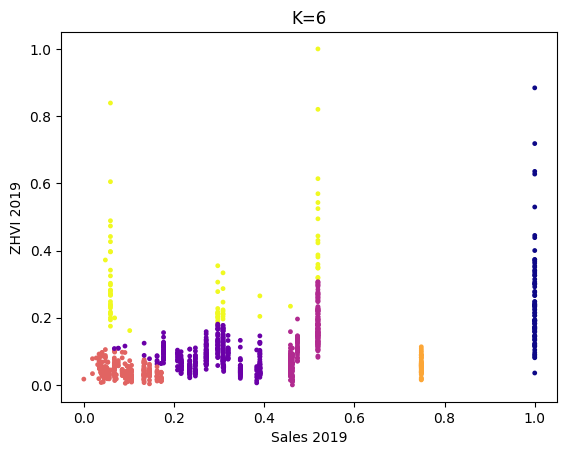

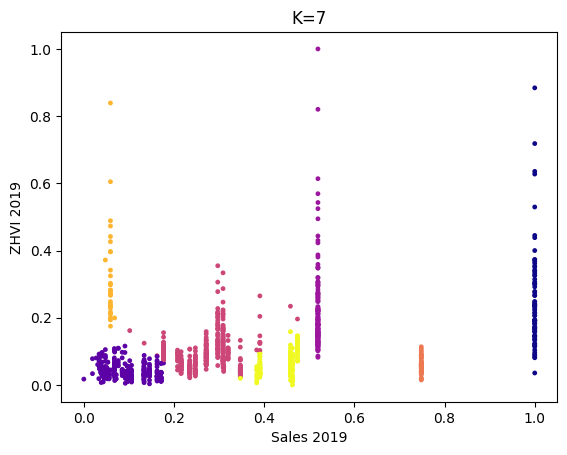

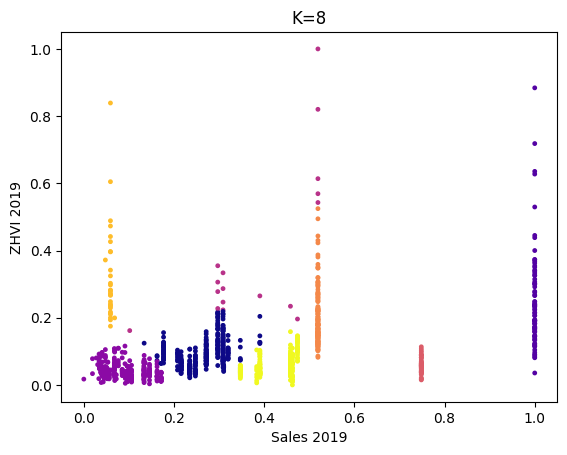

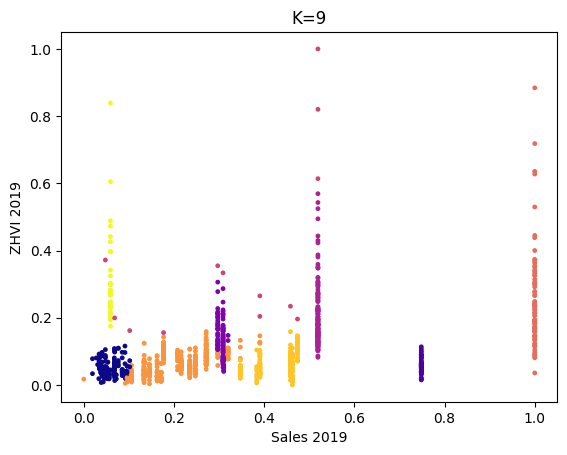

<Figure size 640x480 with 0 Axes>

In [78]:
for k in range(2, 10):
    plt.scatter(normalized_df_2019['Sales 2019'], normalized_df_2019['ZHVI 2019'], c= GaussianMixture(n_components= k).fit_predict(normalized_df_2019[["Sales 2019", 'ZHVI 2019']]), cmap= plt.cm.plasma, s=6)
    plt.title(f"K={k}")
    plt.xlabel("Sales 2019")
    plt.ylabel("ZHVI 2019")
    plt.show()
    plt.clf()

Adding More Features

In [79]:
normalized_df_2019.columns

Index(['ZHVI 2019', 'ZORI 2019', 'Sale Listings 2019', 'Sales 2019',
       'Days on Market 2019', 'New Construction 2019', 'Transit Score',
       'Transit Jobs', 'Population', 'NatWalkInd'],
      dtype='object')

In [86]:
df_2019["GMM 4C6F"] = GaussianMixture(n_components= 4).fit_predict(normalized_df_2019[['ZHVI 2019', 'ZORI 2019', 'Transit Score', 'Transit Jobs', 'Population', 'NatWalkInd']])
df_2019["GMM 4C3F"] = GaussianMixture(n_components= 4).fit_predict(normalized_df_2019[['ZHVI 2019', 'Transit Score', 'Population']])

In [87]:
df_2019

,RegionID,SizeRankZip,RegionName,State,City,ZHVI 2019,ZORI 2019,Sale Listings 2019,Sales 2019,Days on Market 2019,New Construction 2019,Transit Score,Transit Jobs,Population,NatWalkInd,GMM 2F Clusters,GMM AF Clusters,GMM 4C6F,GMM 4C3F
0,91982,1,77494,TX,Katy,321388.348443,1486.067587,31221.333333,6668.750000,63.333333,1167.750000,0.2,56.0,24783.0,7.968900,3,4,0,0
1,91940,3,77449,TX,Katy,188081.681518,1401.065590,31221.333333,6668.750000,63.333333,1167.750000,0.2,56.0,24783.0,11.430193,3,4,0,0
2,91733,5,77084,TX,Houston,183263.902363,1447.512164,31221.333333,6668.750000,63.333333,1167.750000,5.9,218774.0,2439835.0,11.430193,0,5,1,3
7,92045,75,77584,TX,Pearland,270445.249913,1498.669681,31221.333333,6668.750000,63.333333,1167.750000,0.1,417.0,114122.0,6.298689,3,4,0,0
8,91889,88,77379,TX,Spring,251315.069609,1214.629153,31221.333333,6668.750000,63.333333,1167.750000,0.1,0.0,55243.0,11.430193,3,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7371,87877,7753,68131,NE,Omaha,132578.443292,938.126050,3360.583333,1142.750000,51.750000,122.666667,4.7,72687.0,461121.0,11.835345,7,1,0,2
7374,87878,8566,68132,NE,Omaha,227741.806059,874.573564,3360.583333,1142.750000,51.750000,122.666667,4.7,72687.0,461121.0,11.835345,7,1,0,2
7384,87853,11298,68102,NE,Omaha,248639.251148,1013.701541,3360.583333,1142.750000,51.750000,122.666667,4.7,72687.0,461121.0,11.835345,7,1,0,2
7424,80261,3025,50266,IA,West Des Moines,236757.162164,1056.524201,4199.166667,1034.583333,64.250000,201.166667,2.8,97201.0,63463.0,7.635659,2,1,0,0


In [89]:
grouped_dfs = df_2019.groupby("GMM 4C3F")
for name, group in grouped_dfs:
    # Print the group name
    print(f'Group: {name}')
    print(group[["RegionName", "City", 'Population', 'ZHVI 2019', 'Transit Score']].head(10))

Group: 0
    RegionName           City  Population      ZHVI 2019  Transit Score
0        77494           Katy     24783.0  321388.348443            0.2
1        77449           Katy     24783.0  188081.681518            0.2
7        77584       Pearland    114122.0  270445.249913            0.1
8        77379         Spring     55243.0  251315.069609            0.1
9        77459  Missouri City     79219.0  279476.549251            0.8
16       77521        Baytown     69871.0  187333.759904            1.6
18       77373         Spring     55243.0  170077.488325            0.1
19       77386         Spring     55243.0  252790.095725            0.1
20       77396         Humble     13900.0  186279.058186            0.2
29       77581       Pearland    114122.0  261736.154563            0.1
Group: 1
     RegionName      City  Population     ZHVI 2019  Transit Score
220       11385  New York   8560072.0  7.372708e+05            9.6
223       10467  New York   8560072.0  3.903094e+05     